In [1]:
# EOReader Imports
import os
import xarray as xr
from eoreader.reader import Reader
from eoreader.products import SensorType
from eoreader.bands.alias import *
from sertit import display

reader = Reader()

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"))

In [3]:
# Set a DEM
from eoreader.env_vars import DEM_PATH

os.environ[DEM_PATH] = os.path.join("/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL", "COPDEM_30m",
                                    "COPDEM_30m.vrt")

In [4]:
# Paths
stack_folder = os.path.join("/home", "data", "DS3", "CI", "eoreader", "others")
opt_path = os.path.join(stack_folder, "20200310T030415_WV02_Ortho_BGRN_STK.tif")
sar_path = os.path.join(stack_folder, "20210827T162210_ICEYE_SC_GRD_STK.tif")

In [5]:
# Optical minimum example
opt_prod = reader.open(opt_path,
                       custom=True,
                       sensor_type="OPTICAL",  # With a string
                       band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5})
opt_stack = opt_prod.stack([BLUE, GREEN, RED])

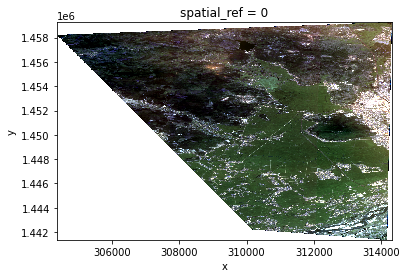

In [6]:
xr.plot.imshow(opt_stack.copy(data=display.scale(opt_stack.data)))

In [7]:
opt_stack

<xarray.DataArray 'BLUE GREEN RED' (z: 3, y: 2237, x: 1244)>
array([[[       nan,        nan,        nan, ..., 0.02729181,
         0.03021449, 0.0321508 ],
        [       nan,        nan,        nan, ..., 0.03289769,
         0.03252383, 0.03231718],
        [       nan,        nan,        nan, ..., 0.03253607,
         0.03250813, 0.03260763],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ..., 0.0325688 ,
         0.03575394, 0.03786882],
        [       nan,        nan,        nan, ..., 0.03874811,
         0.0377332 , 0.0372853 ],
        [       nan,        nan,        nan, ..., 0.03795209,
         0.03785328, 0.03810363],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ..., 0.02202989,
         0.02403895, 0.02508134],
        [       nan,        nan,        nan, ..., 0.02564428,
         0.02424301, 0.02346394],
        [       nan,        nan,        nan, ..., 0.0244639 ,
         0.02421321, 0.02448287],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
  * z            (z) MultiIndex
  - variable     (z) object 'BLUE' 'GREEN' 'RED'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         BLUE GREEN RED
    sensor:            CUSTOM
    sensor_id:         CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20200310T030415_WV02...
    product_name:      20200310T030415_WV02_Ortho_BGRN_STK
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    product_type:      CUSTOM
    acquisition_date:  20220112T083323
    condensed_name:    20220112T083323_CUSTOM_CUSTOM

In [8]:
# SAR minimum example
sar_prod = reader.open(sar_path,
                       custom=True,
                       sensor_type=SensorType.SAR,  # With the Enum
                       band_map={VV: 1, VV_DSPK: 2})
sar_stack = sar_prod.stack([SLOPE, VV, VV_DSPK])

2022-01-12 08:33:26,570 - [DEBUG] - Warping DEM for 20220112T083325_CUSTOM_CUSTOM


2022-01-12 08:33:26,573 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt


2022-01-12 08:33:30,285 - [DEBUG] - Computing slope for 20220112T083325_CUSTOM_CUSTOM


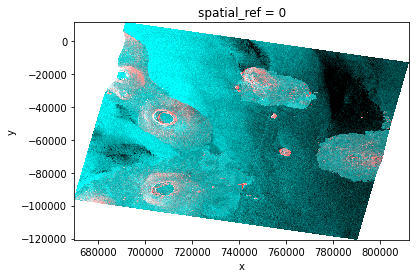

In [9]:
xr.plot.imshow(sar_stack.copy(data=display.scale(sar_stack.data)))

In [10]:
sar_stack

<xarray.DataArray 'SLOPE VV VV_DSPK' (z: 3, y: 2748, x: 2967)>
array([[[1.1417845 , 0.9661645 , 0.88848215, ..., 0.        ,
         0.        , 0.        ],
        [0.91908467, 0.8988768 , 0.9166924 , ..., 0.        ,
         0.        , 0.        ],
        [1.0019214 , 0.84933126, 0.86957526, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 6.7e+05 6.701e+05 6.701e+05 ... 8.124e+05 8.124e+05
  * y            (y) float64 1.113e+04 1.109e+04 ... -1.206e+05 -1.207e+05
  * z            (z) MultiIndex
  - variable     (z) object 'SLOPE' 'VV' 'VV_DSPK'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         SLOPE VV VV_DSPK
    sensor:            CUSTOM
    sensor_id:         CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20210827T162210_ICEY...
    product_name:      20210827T162210_ICEYE_SC_GRD_STK
    product_filename:  20210827T162210_ICEYE_SC_GRD_STK
    product_type:      CUSTOM
    acquisition_date:  20220112T083325
    condensed_name:    20220112T083325_CUSTOM_CUSTOM

<AxesSubplot:>

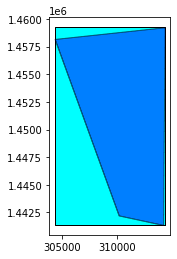

In [11]:
# You can compute the footprint and the extent
base = opt_prod.extent.plot(color='cyan', edgecolor='black')
opt_prod.footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

<AxesSubplot:>

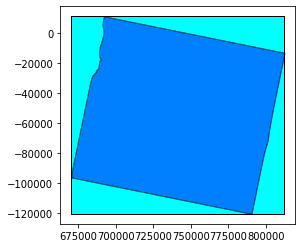

In [12]:
base = sar_prod.extent.plot(color='cyan', edgecolor='black')
sar_prod.footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [13]:
# Optical
opt_prod = reader.open(
    opt_path,
    custom=True,
    name="20200310T030415_WV02_Ortho",
    acquisition_datetime="20200310T030415",
    sensor_type=SensorType.OPTICAL,
    platform="WV02",
    product_type="Ortho",
    default_resolution=2.0,
    sun_azimuth=10.0,
    sun_zenith=20.0,
    band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5},
)
hillshade = opt_prod.load(HILLSHADE)[HILLSHADE]

2022-01-12 08:33:33,225 - [DEBUG] - Warping DEM for 20200310T030415_WV02_Ortho


2022-01-12 08:33:33,229 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt


2022-01-12 08:33:33,874 - [DEBUG] - Computing hillshade DEM for 20200310T030415_WV02_Ortho


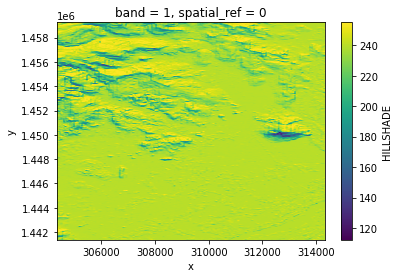

In [14]:
hillshade.plot()

In [15]:
hillshade

<xarray.DataArray 'HILLSHADE' (band: 1, y: 2237, x: 1244)>
array([[[243.5148 , 244.15515, 244.76294, ..., 239.26723, 239.37088,
         239.47406],
        [241.75117, 242.62433, 243.46106, ..., 239.39891, 239.43938,
         239.48117],
        [239.7554 , 240.88208, 241.96498, ..., 239.66376, 239.59615,
         239.53004],
        ...,
        [247.74507, 248.3067 , 246.9472 , ..., 239.20195, 239.27254,
         239.39708],
        [247.93413, 248.49562, 246.84186, ..., 239.26035, 239.3623 ,
         239.51692],
        [248.09465, 248.6562 , 246.72041, ..., 239.2324 , 239.33617,
         239.4908 ]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:      1.0
    add_offset:        0.0
    long_name:         HILLSHADE
    sensor:            WorldView-2
    sensor_id:         WV02
    product_path:      /home/data/DS3/CI/eoreader/others/20200310T030415_WV02...
    product_name:      20200310T030415_WV02_Ortho
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    product_type:      Ortho
    acquisition_date:  20200310T030415
    condensed_name:    20200310T030415_WV02_Ortho

In [16]:
# SAR
sar_prod = reader.open(
    sar_path,
    custom=True,
    sensor_type=SensorType.SAR,
    name="20210827T162210_ICEYE_SC_GRD",
    acquisition_datetime="20210827T162210",
    platform="ICEYE",
    product_type="GRD",
    default_resolution=6.0,
    band_map={VV: 1, VV_DSPK: 2},
)
vv = sar_prod.load(VV)[VV]

In [17]:
vv

<xarray.DataArray 'VV' (band: 1, y: 2748, x: 2967)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.7e+05 6.701e+05 6.701e+05 ... 8.124e+05 8.124e+05
  * y            (y) float64 1.113e+04 1.109e+04 ... -1.206e+05 -1.207e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:      1.0
    add_offset:        0.0
    long_name:         VV
    sensor:            ICEYE
    sensor_id:         ICEYE
    product_path:      /home/data/DS3/CI/eoreader/others/20210827T162210_ICEY...
    product_name:      20210827T162210_ICEYE_SC_GRD
    product_filename:  20210827T162210_ICEYE_SC_GRD_STK
    product_type:      GRD
    acquisition_date:  20210827T162210
    condensed_name:    20210827T162210_ICEYE_GRD